In [60]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3
%matplotlib inline

In [61]:
# サンプルデータの作成
weather = [ "cloudy", "cloudy", "rainy", "rainy", "sunny", "sunny" ]
beer = [6, 8, 2, 4, 10, 12]
weather_beer = pd.DataFrame({
    "beer": beer,
    "weather": weather
})
print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


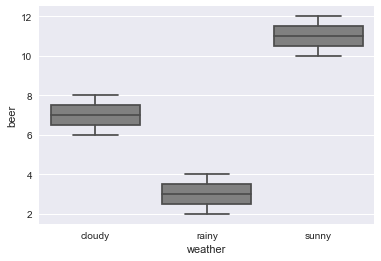

In [62]:
sns.boxplot(x="weather", y="beer", data=weather_beer, color="gray")

In [63]:
# 効果：天気ごとの売上の平均値
weather_mean = weather_beer.groupby("weather").mean()
print(weather_mean)

         beer
weather      
cloudy      7
rainy       3
sunny      11


In [64]:
# 1. 群間・郡内平方和の計算
# 天気のもつ影響（効果）
effect = [7,7,3,3,11,11]

mu_effect = sp.mean(effect)
squares_model = sp.sum((effect - mu_effect)**2)
print(squares_model)

64.0


In [65]:
# 誤差の影響　元データから効果を引く
resid = weather_beer.beer - effect
print(resid)

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64


In [66]:
squares_resid = sp.sum(resid**2)
print(squares_resid)

6


In [67]:
# 2.群間・郡内分散の計算

# 自由度を計算
# 効果の自由度=水準の数 - 1
# 影響の自由度=サンプルサイズ - 水準の数
df_model = 2 # 群間変動の自由度
df_resid = 3 # 郡内変動の自由度

In [68]:
# 群間変動の分散
variance_model = squares_model / df_model
print(variance_model)

32.0


In [69]:
# 郡内変動の分散
variance_resid = squares_resid / df_resid
print(variance_resid)

2.0


In [70]:
# F比からp値を計算
f_ratio = variance_model / variance_resid
print(f_ratio)

16.0


In [71]:
# p値をF分布の累積分布関数から計算
fP_value = 1 - sp.stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)
print(fP_value)

0.02509457330439091


In [72]:
weather_beer

,beer,weather
0,6,cloudy
1,8,cloudy
2,2,rainy
3,4,rainy
4,10,sunny
5,12,sunny


In [73]:
# 正規線形モデルにカテゴリ型の説明変数を組み込んで、ビールの売上モデルを作る。
# カテゴリ型に0/1のダミー変数をつける
# beer ~ N(beta0 + beta1 * 雨 + beta2 * 晴れ,  σ^2)

anova_model = smf.ols("beer ~ weather", data = weather_beer).fit()

# 分散分析の実行 (ANalysis Of VAriance)
print(sm.stats.anova_lm(anova_model, typ=2)) # 分散分析表

          sum_sq   df     F    PR(>F)
weather     64.0  2.0  16.0  0.025095
Residual     6.0  3.0   NaN       NaN


In [74]:
# 推定されたモデルの係数
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

In [75]:
# 推定モデルを用いて、訓練データに対する当てはめ結果を見る
fitted = anova_model.fittedvalues
fitted

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [76]:
# 残差
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

In [77]:
# 回帰モデル（説明変数が連続値）における分散分析

beer = pd.read_csv("./data/5-1-1-beer.csv")
lm_model = smf.ols(formula="beer ~ temperature", data=beer).fit()
print(sm.stats.anova_lm(lm_model, typ=2))

                  sum_sq    df          F    PR(>F)
temperature  1651.532489   1.0  28.446984  0.000011
Residual     1625.582178  28.0        NaN       NaN


In [78]:
print(lm_model.params)


Intercept      34.610215
temperature     0.765428
dtype: float64


In [79]:
beer_fitted = lm_model.fittedvalues
beer_fitted

0     50.301481
1     53.745905
2     42.264491
3     55.200217
4     46.703971
5     37.825011
6     44.943488
7     54.511333
8     52.444678
9     41.116350
10    54.664418
11    49.229882
12    53.210106
13    52.444678
14    41.039807
15    52.597764
16    45.249659
17    61.782895
18    55.429846
19    50.301481
20    42.417577
21    50.301481
22    51.143451
23    40.657093
24    66.911259
25    52.903935
26    62.854493
27    41.422521
28    62.471779
29    39.508952
dtype: float64

In [80]:
print(lm_model.resid)

0     -5.001481
1      5.554095
2     -1.864491
3    -17.200217
4     -9.703971
5      3.074989
6     15.256512
7      8.788667
8     -1.344678
9      3.783650
10    -7.664418
11     3.970118
12    -9.710106
13     0.755322
14    -3.639807
15     7.302236
16    -3.749659
17    13.317105
18     0.170154
19     6.898519
20     4.082423
21   -14.501481
22     0.756549
23    -2.457093
24    -0.911259
25     2.396065
26    -7.554493
27     1.877479
28     8.028221
29    -0.708952
dtype: float64


In [81]:
# マニュアルでF分布のp値を計算

# 群間変動(モデル変動)
lm_effect = lm_model.fittedvalues
lm_effect_mean = sp.sum(lm_effect) / len(lm_effect)
lm_effect_squares = sp.sum((lm_effect - lm_effect_mean) ** 2)
lm_effect_df = 2 - 1 # パラメータ数 - 1
lm_effect_var = lm_effect_squares / lm_effect_df

# 郡内変動(残差変動)
lm_resid = lm_model.resid
lm_resid_squares = sp.sum(lm_resid ** 2) # 残差の平均値はゼロ
lm_resid_df = len(beer) - 2 # サンプルサイズ - パラメータ数
lm_resid_var = lm_resid_squares / lm_resid_df

# F値
F_value = lm_effect_var / lm_resid_var
print(F_value)
F_p = 1.0 - sp.stats.f.cdf(x=F_value, dfn=lm_effect_df, dfd=lm_resid_df)
print(F_p)

28.446983688504666
1.1148907825053733e-05


In [82]:
# 単回帰分析のサマリー
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Fri, 17 Aug 2018   Prob (F-statistic):           1.11e-05
Time:                        19:14:34   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

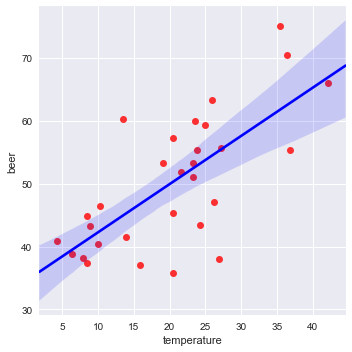

In [83]:
sns.lmplot(x="temperature", y="beer", data=beer, scatter_kws = {"color": "red"}, line_kws={"color": "blue"})

In [84]:
# 自由度調整済み決定係数
beer_mean = sp.sum(beer["beer"]) / len(beer["beer"])
model_hendo = sp.sum((lm_model.fittedvalues - beer_mean) ** 2)
all_hendo = sp.sum((beer["beer"] - beer_mean) ** 2)
R_squared = model_hendo / all_hendo
print(R_squared)
lm_model_df = len(beer["beer"]) - 1 - 1
lm_all_df = len(beer["beer"]) - 1

R_squared_adj = 1 - (lm_resid_squares / lm_resid_df) / (all_hendo / lm_all_df)
print(R_squared_adj)

0.503959323061188
0.4862435845990851


"複数の説明変数持つモデルに対する分散分析"

In [85]:
sales = pd.read_csv("./data/5-3-1-lm-model.csv")
print(sales)

    humidity  price  sales  temperature weather
0       29.5    290  229.7         17.8   rainy
1       38.1    290  206.1         26.1   rainy
2       31.5    290  202.5         22.0   rainy
3       39.7    290  195.5         23.0   rainy
4       24.7    290  214.4         14.5   rainy
5       27.2    290  174.4         20.8   rainy
6       29.3    290  238.6         23.7   rainy
7       26.4    290  190.8         15.2   rainy
8       27.9    290  211.2         18.7   rainy
9       38.0    290  204.5         20.2   rainy
10      26.9    290  221.7         13.1   rainy
11      28.9    290  179.0         21.6   rainy
12      37.9    290  208.2         24.2   rainy
13      27.7    290  197.1         15.7   rainy
14      29.4    290  227.2         21.8   rainy
15      30.7    290  183.6         13.4   rainy
16      33.8    290  205.2         19.8   rainy
17      25.8    290  185.1         11.9   rainy
18      39.6    290  215.4         25.6   rainy
19      33.6    290  219.1         22.0 

Index(['humidity', 'price', 'sales', 'temperature', 'weather'], dtype='object')


<Figure size 432x288 with 0 Axes>

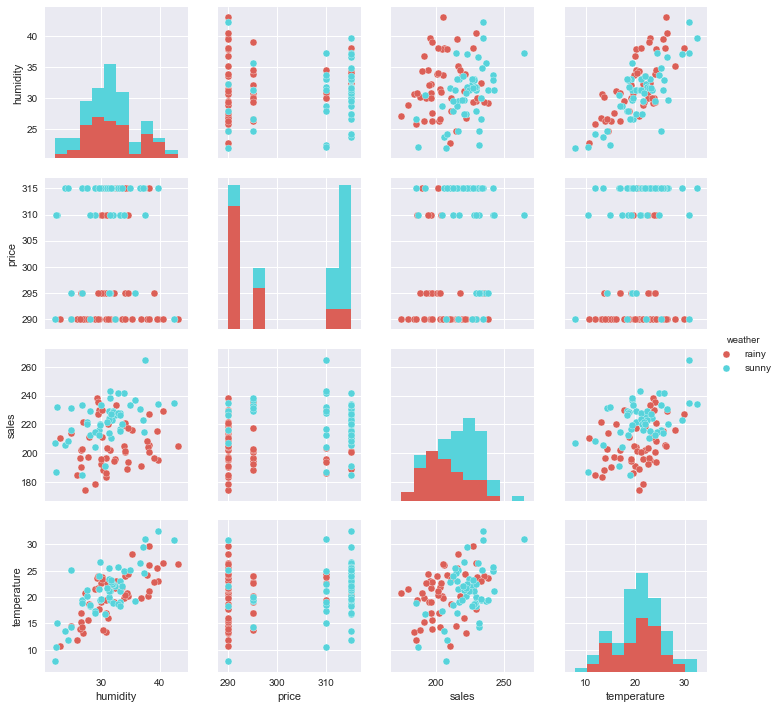

In [86]:
# ペアプロット
print(sales.columns)
plt.figure(figsize=(6, 4))
sns.pairplot(data=sales, hue="weather", palette="hls")

In [87]:
# 天気によって分ける

# 晴れ/雨
print(sales.groupby("weather").mean())

         humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102


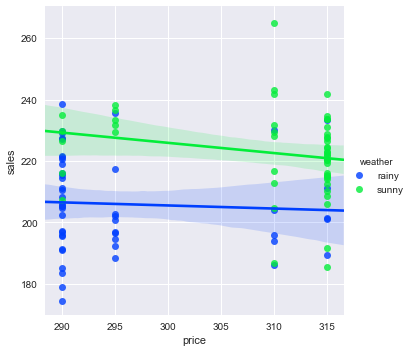

In [88]:
sns.lmplot(x="price",y="sales", data=sales, hue="weather", palette="bright")

In [89]:
# 複数の説明変数を持つモデル
lm_sales = smf.ols("sales ~ weather + humidity + temperature + price", data=sales).fit()
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [90]:
# 複数の説明変数を持つモデルにおいて、回帰係数の有効性を検討するー＞「type2 anova(分散分析)」 or 「回帰係数毎にt検定」

# 回帰係数ごとにt検定
# 帰無仮説：対象の回帰係数は意味があるかわからない つまり、回帰係数は0を示す
# 対立仮説：その回帰係数は必要
# 回帰係数のt値= (回帰係数 - 0) / 　標準誤差
# t検定で回帰係数が0と異なるかどうかをチェック
# 回帰係数の標準誤差SE = sp.sqrt(Ve / Sxx)
# 残差の不偏分散Ve = sp.sum(resid**2) / (N - 2)
# 説明変数xの偏差平方和Sxx = sp.sum((xi - mean_xi) ** 2)

# 回帰係数のt検定
lm_sales.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     16.15
Date:                Fri, 17 Aug 2018   Prob (F-statistic):           4.01e-10
Time:                        19:51:46   Log-Likelihood:                -399.39
No. Observations:                 100   AIC:                             808.8
Df Residuals:                      95   BIC:                             821.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          278.6277     46.335      6.013      0.000     186.641     370.615
weather[T.sunny]    19.9891      3.522      5.675      0.000      12.997      26.982
humidity            -0.2541      0.456     -0.558      0.578      -1.159       0.651
temperature          1.6031      0.443      3.620      0.000       0.724       2.482
price               -0.3292      0.155     -2.123      0.036      -0.637      -0.021
==============================================================================
Omnibus:                        0.160   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.016
Skew:                          -0.028   Prob(JB):                        0.992
Kurtosis:                       3.027   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

分散分析によるモデル選択

In [100]:
# type2 anova分析　
# すべての説明変数が含まれたモデルを構築して、残差平方和を求める。P.333
model_full = smf.ols("sales ~ weather + humidity + temperature + price", data=sales).fit()
resid_sq_full = sp.sum(model_full.resid ** 2)
print(resid_sq_full)

17242.71694236649


In [102]:
# 湿度だけを取り除いたモデルの残差平方和
model_non_humi = smf.ols("sales ~ weather + temperature + price", data=sales).fit()
resid_sq_non_humi = sp.sum(model_non_humi.resid ** 2)
print(resid_sq_non_humi)

17299.142016107657


In [105]:
# その残差平方和の差
resid_sq_non_humi - resid_sq_full

56.42507374116758

In [107]:
# 調整平方和を用いた分散分析type 2 anova
print(sm.stats.anova_lm(model_full, typ=2).round(3))

                sum_sq    df       F  PR(>F)
weather       5845.878   1.0  32.208   0.000
humidity        56.425   1.0   0.311   0.578
temperature   2378.017   1.0  13.102   0.000
price          818.402   1.0   4.509   0.036
Residual     17242.717  95.0     NaN     NaN


In [109]:
# 2つのモデルを直接比較 (F比, p値,２つのモデルの自由度の差)
model_full.compare_f_test(model_non_humi)

(0.310878037569596, 0.578453342712099, 1.0)

In [110]:
# 湿度を除いたモデルが妥当
sm.stats.anova_lm(model_non_humi, typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,6354.966,1.0,35.266,0.000
temperature,4254.736,1.0,23.611,0.000
price,803.644,1.0,4.460,0.037
Residual,17299.142,96.0,NaN,NaN


In [111]:
model_non_humi.params

Intercept           273.301800
weather[T.sunny]     20.393871
temperature           1.417860
price                -0.326001
dtype: float64

AICによるモデル選択


分散分析のように計算方法を変える必要はない。愚直にモデルを作って、AICを比較するだけ

In [ ]:
# すべての説明変数を持つモデルと「湿度」を除いたモデルのAICを比較
print("全変数入りモデル:", model_full.aic.round(3))
print("湿度抜きモデル:", )